In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("C:/Users/ASUS/Desktop/Semester1/Data mining/Midterm Project/Student Retention Challenge Data/Merged Data/df_new.csv")

In [ ]:
df

,StudentID,cohort,cohort term,Marital Status,Adjusted Gross Income,Parent Adjusted Gross Income,Father's Highest Grade Level,Mother's Highest Grade Level,Housing,2012 Loan,...,Major2,Complete1,Complete2,CompleteCIP1,CompleteCIP2,TransferIntent,DegreeTypeSought,cGPA,maxGPA,minGPA
0,20932,2014-15,1,Married,52555.0,0.0,Unknown,Unknown,Off Campus,NaN,...,-1.0000,0,0,-2.0000,-2,-1,6,0.00,0.00,0.00
1,21868,2014-15,1,Single,30600.0,0.0,High School,High School,Off Campus,NaN,...,-1.0000,7,0,23.0101,-2,-1,6,3.82,4.00,3.37
2,21943,2012-13,1,Single,27879.0,0.0,Unknown,High School,Off Campus,NaN,...,-1.0000,0,0,-2.0000,-2,-1,6,0.00,0.00,0.00
3,22011,2011-12,1,Single,8845.0,0.0,College,College,Off Campus,9500.0,...,-1.0000,7,0,42.0101,-2,-1,6,3.30,4.00,2.50
4,22163,2013-14,3,Single,26794.0,0.0,Unknown,College,Off Campus,NaN,...,-1.0000,0,0,-2.0000,-2,-1,6,3.30,4.00,2.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13256,359313,2016-17,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.0000,0,0,-2.0000,-2,-1,6,4.00,4.00,4.00
13257,359320,2016-17,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.0000,0,0,-2.0000,-2,-1,6,4.00,4.00,4.00
13258,359327,2016-17,1,Single,0.0,25679.0,Unknown,Unknown,With Parent,NaN,...,-1.0000,0,0,-2.0000,-2,-1,6,0.81,0.81,0.81
13259,359554,2016-17,1,Married,35308.0,0.0,High School,High School,Off Campus,NaN,...,54.0101,0,0,-2.0000,-2,-1,6,4.00,4.00,4.00


In [ ]:
df.columns

Index(['StudentID', 'cohort', 'cohort term', 'Marital Status',
       'Adjusted Gross Income', 'Parent Adjusted Gross Income',
       'Father's Highest Grade Level', 'Mother's Highest Grade Level',
       'Housing', '2012 Loan', '2012 Scholarship', '2012 Work/Study',
       '2012 Grant', '2013 Loan', '2013 Scholarship', '2013 Work/Study',
       '2013 Grant', '2014 Loan', '2014 Scholarship', '2014 Work/Study',
       '2014 Grant', '2015 Loan', '2015 Scholarship', '2015 Work/Study',
       '2015 Grant', '2016 Loan', '2016 Scholarship', '2016 Work/Study',
       '2016 Grant', '2017 Loan', '2017 Scholarship', '2017 Work/Study',
       '2017 Grant', 'Cohort_x', 'CohortTerm_x', 'Campus', 'Address1',
       'Address2', 'City', 'State', 'Zip', 'RegistrationDate', 'Gender',
       'BirthYear', 'BirthMonth', 'Hispanic', 'AmericanIndian', 'Asian',
       'Black', 'NativeHawaiian', 'White', 'TwoOrMoreRace', 'HSDip', 'HSDipYr',
       'HSGPAUnwtd', 'HSGPAWtd', 'FirstGen', 'DualHSSummerEnroll',
   

In [ ]:
# fill the NA values in Financial Aid data with 0
start_col = '2012 Loan'
end_col = '2017 Grant'
columns_to_fill = df.loc[:, start_col:end_col].columns
df[columns_to_fill] = df[columns_to_fill].fillna(0)

In [ ]:
na_count_per_column = df.isna().sum()

# print the NA value counts in each column
print(na_count_per_column)

StudentID                   0
cohort                      0
cohort term                 0
Marital Status           1992
Adjusted Gross Income    1992
                         ... 
TransferIntent              0
DegreeTypeSought            0
cGPA                        0
maxGPA                      0
minGPA                      0
Length: 84, dtype: int64


In [ ]:
max(na_count_per_column)

13261

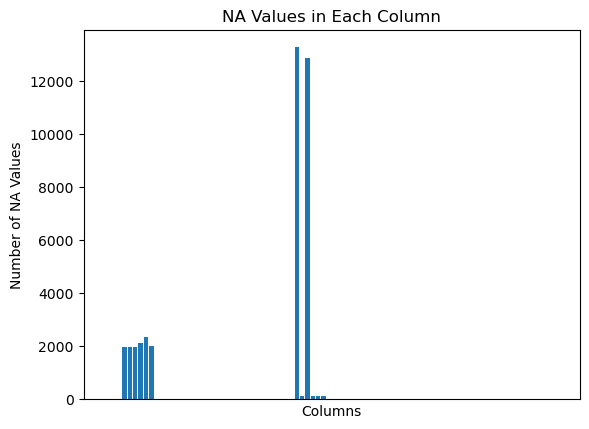

In [ ]:
na_values = df.isna()

# count each column NA values
na_count_per_column = na_values.sum()

# make a plot
plt.bar(na_count_per_column.index, na_count_per_column)
plt.title('NA Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Number of NA Values')
plt.xticks([])
plt.show()






In [ ]:
na_count_per_column = df.isna().sum()

# find the column have the most NA values
most_missing_column = na_count_per_column.idxmax()
most_missing_column

'Campus'

In [ ]:
second_most_missing_column = na_count_per_column.nlargest(2).index[1]
second_most_missing_column

'Address2'

In [ ]:
df.drop(['Campus','Address2'], axis=1, inplace=True)

In [ ]:
df

,StudentID,cohort,cohort term,Marital Status,Adjusted Gross Income,Parent Adjusted Gross Income,Father's Highest Grade Level,Mother's Highest Grade Level,Housing,2012 Loan,...,Major2,Complete1,Complete2,CompleteCIP1,CompleteCIP2,TransferIntent,DegreeTypeSought,cGPA,maxGPA,minGPA
0,20932,2014-15,1,Married,52555.0,0.0,Unknown,Unknown,Off Campus,0.0,...,-1.0000,0,0,-2.0000,-2,-1,6,0.00,0.00,0.00
1,21868,2014-15,1,Single,30600.0,0.0,High School,High School,Off Campus,0.0,...,-1.0000,7,0,23.0101,-2,-1,6,3.82,4.00,3.37
2,21943,2012-13,1,Single,27879.0,0.0,Unknown,High School,Off Campus,0.0,...,-1.0000,0,0,-2.0000,-2,-1,6,0.00,0.00,0.00
3,22011,2011-12,1,Single,8845.0,0.0,College,College,Off Campus,9500.0,...,-1.0000,7,0,42.0101,-2,-1,6,3.30,4.00,2.50
4,22163,2013-14,3,Single,26794.0,0.0,Unknown,College,Off Campus,0.0,...,-1.0000,0,0,-2.0000,-2,-1,6,3.30,4.00,2.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13256,359313,2016-17,1,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,-1.0000,0,0,-2.0000,-2,-1,6,4.00,4.00,4.00
13257,359320,2016-17,1,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,-1.0000,0,0,-2.0000,-2,-1,6,4.00,4.00,4.00
13258,359327,2016-17,1,Single,0.0,25679.0,Unknown,Unknown,With Parent,0.0,...,-1.0000,0,0,-2.0000,-2,-1,6,0.81,0.81,0.81
13259,359554,2016-17,1,Married,35308.0,0.0,High School,High School,Off Campus,0.0,...,54.0101,0,0,-2.0000,-2,-1,6,4.00,4.00,4.00


In [ ]:
columns_with_missing_values = df.columns[df.isnull().any()].tolist()

In [ ]:
for column in columns_with_missing_values:
    missing_count = df[column].isnull().sum()
    print(f"Column '{column}' has {missing_count} missing value(s).")

Column 'Marital Status' has 1992 missing value(s).
Column 'Adjusted Gross Income' has 1992 missing value(s).
Column 'Parent Adjusted Gross Income' has 1992 missing value(s).
Column 'Father's Highest Grade Level' has 2127 missing value(s).
Column 'Mother's Highest Grade Level' has 2339 missing value(s).
Column 'Housing' has 2016 missing value(s).
Column 'Address1' has 113 missing value(s).
Column 'City' has 114 missing value(s).
Column 'State' has 113 missing value(s).
Column 'Zip' has 134 missing value(s).
Column 'BirthYear' has 1 missing value(s).


In [ ]:
df.dropna(inplace=True)

In [ ]:
df

,StudentID,cohort,cohort term,Marital Status,Adjusted Gross Income,Parent Adjusted Gross Income,Father's Highest Grade Level,Mother's Highest Grade Level,Housing,2012 Loan,...,Major2,Complete1,Complete2,CompleteCIP1,CompleteCIP2,TransferIntent,DegreeTypeSought,cGPA,maxGPA,minGPA
0,20932,2014-15,1,Married,52555.0,0.0,Unknown,Unknown,Off Campus,0.0,...,-1.0000,0,0,-2.0000,-2,-1,6,0.00,0.00,0.00
1,21868,2014-15,1,Single,30600.0,0.0,High School,High School,Off Campus,0.0,...,-1.0000,7,0,23.0101,-2,-1,6,3.82,4.00,3.37
2,21943,2012-13,1,Single,27879.0,0.0,Unknown,High School,Off Campus,0.0,...,-1.0000,0,0,-2.0000,-2,-1,6,0.00,0.00,0.00
3,22011,2011-12,1,Single,8845.0,0.0,College,College,Off Campus,9500.0,...,-1.0000,7,0,42.0101,-2,-1,6,3.30,4.00,2.50
4,22163,2013-14,3,Single,26794.0,0.0,Unknown,College,Off Campus,0.0,...,-1.0000,0,0,-2.0000,-2,-1,6,3.30,4.00,2.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13251,359257,2016-17,1,Married,14212.0,0.0,High School,Middle School,Off Campus,0.0,...,-1.0000,0,0,-2.0000,-2,-1,6,3.69,3.90,3.51
13253,359271,2016-17,1,Married,215486.0,0.0,Unknown,Unknown,Off Campus,0.0,...,-1.0000,0,0,-2.0000,-2,-1,6,3.95,4.00,3.70
13254,359280,2016-17,1,Single,0.0,44382.0,High School,High School,With Parent,0.0,...,-1.0000,0,0,-2.0000,-2,-1,6,1.04,1.61,0.00
13258,359327,2016-17,1,Single,0.0,25679.0,Unknown,Unknown,With Parent,0.0,...,-1.0000,0,0,-2.0000,-2,-1,6,0.81,0.81,0.81


In [ ]:
print(df.dtypes)

StudentID                  int64
cohort                    object
cohort term                int64
Marital Status            object
Adjusted Gross Income    float64
                          ...   
TransferIntent             int64
DegreeTypeSought           int64
cGPA                     float64
maxGPA                   float64
minGPA                   float64
Length: 82, dtype: object


In [ ]:
label_encoder = LabelEncoder()

In [ ]:
# find all the 'object' feature in the df
object_columns = df.select_dtypes(include=['object']).columns
for col in object_columns:
    print(f"{col}: {df.columns.get_loc(col)}")

cohort: 1
Marital Status: 3
Father's Highest Grade Level: 6
Mother's Highest Grade Level: 7
Housing: 8
Cohort_x: 33
Address1: 35
City: 36
State: 37
Cohort_y: 65
AcademicYear: 68


In [ ]:
df["Marital Status"] = label_encoder.fit_transform(df["Marital Status"])
df["Father's Highest Grade Level"] = label_encoder.fit_transform(df["Father's Highest Grade Level"])
df["Mother's Highest Grade Level"] = label_encoder.fit_transform(df["Mother's Highest Grade Level"])
df["Housing"] = label_encoder.fit_transform(df["Housing"])
df["City"] = label_encoder.fit_transform(df["City"])

In [ ]:
df.drop(['cohort','Cohort_x','Cohort_y','State','Cohort_y','Address1','AcademicYear'], axis=1, inplace=True)
df

,StudentID,cohort term,Marital Status,Adjusted Gross Income,Parent Adjusted Gross Income,Father's Highest Grade Level,Mother's Highest Grade Level,Housing,2012 Loan,2012 Scholarship,...,Major2,Complete1,Complete2,CompleteCIP1,CompleteCIP2,TransferIntent,DegreeTypeSought,cGPA,maxGPA,minGPA
0,20932,1,1,52555.0,0.0,3,3,0,0.0,0.0,...,-1.0000,0,0,-2.0000,-2,-1,6,0.00,0.00,0.00
1,21868,1,3,30600.0,0.0,1,1,0,0.0,0.0,...,-1.0000,7,0,23.0101,-2,-1,6,3.82,4.00,3.37
2,21943,1,3,27879.0,0.0,3,1,0,0.0,0.0,...,-1.0000,0,0,-2.0000,-2,-1,6,0.00,0.00,0.00
3,22011,1,3,8845.0,0.0,0,0,0,9500.0,0.0,...,-1.0000,7,0,42.0101,-2,-1,6,3.30,4.00,2.50
4,22163,3,3,26794.0,0.0,3,0,0,0.0,0.0,...,-1.0000,0,0,-2.0000,-2,-1,6,3.30,4.00,2.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13251,359257,1,1,14212.0,0.0,1,2,0,0.0,0.0,...,-1.0000,0,0,-2.0000,-2,-1,6,3.69,3.90,3.51
13253,359271,1,1,215486.0,0.0,3,3,0,0.0,0.0,...,-1.0000,0,0,-2.0000,-2,-1,6,3.95,4.00,3.70
13254,359280,1,3,0.0,44382.0,1,1,2,0.0,0.0,...,-1.0000,0,0,-2.0000,-2,-1,6,1.04,1.61,0.00
13258,359327,1,3,0.0,25679.0,3,3,2,0.0,0.0,...,-1.0000,0,0,-2.0000,-2,-1,6,0.81,0.81,0.81


In [ ]:
train_df = pd.read_csv("C:/Users/ASUS/Desktop/Semester1/Data mining/Midterm Project/DropoutTrainLabels.csv")
train_df = pd.merge(df, train_df, on='StudentID', how='inner')
train_df

,StudentID,cohort term,Marital Status,Adjusted Gross Income,Parent Adjusted Gross Income,Father's Highest Grade Level,Mother's Highest Grade Level,Housing,2012 Loan,2012 Scholarship,...,Complete1,Complete2,CompleteCIP1,CompleteCIP2,TransferIntent,DegreeTypeSought,cGPA,maxGPA,minGPA,Dropout
0,20932,1,1,52555.0,0.0,3,3,0,0.0,0.0,...,0,0,-2.0000,-2,-1,6,0.00,0.00,0.00,1
1,21868,1,3,30600.0,0.0,1,1,0,0.0,0.0,...,7,0,23.0101,-2,-1,6,3.82,4.00,3.37,0
2,21943,1,3,27879.0,0.0,3,1,0,0.0,0.0,...,0,0,-2.0000,-2,-1,6,0.00,0.00,0.00,1
3,22163,3,3,26794.0,0.0,3,0,0,0.0,0.0,...,0,0,-2.0000,-2,-1,6,3.30,4.00,2.15,0
4,23538,3,3,28376.0,0.0,0,1,0,0.0,0.0,...,8,0,51.3801,-2,-1,6,3.73,4.00,3.57,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,359257,1,1,14212.0,0.0,1,2,0,0.0,0.0,...,0,0,-2.0000,-2,-1,6,3.69,3.90,3.51,0
9994,359271,1,1,215486.0,0.0,3,3,0,0.0,0.0,...,0,0,-2.0000,-2,-1,6,3.95,4.00,3.70,0
9995,359280,1,3,0.0,44382.0,1,1,2,0.0,0.0,...,0,0,-2.0000,-2,-1,6,1.04,1.61,0.00,0
9996,359327,1,3,0.0,25679.0,3,3,2,0.0,0.0,...,0,0,-2.0000,-2,-1,6,0.81,0.81,0.81,0


In [ ]:
# fit the data with decision tree

X, y = train_df.drop(['StudentID','Dropout'], axis=1), train_df['Dropout']

# split the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# use DecisionTree Classifier
tree_classifier = DecisionTreeClassifier(random_state=42)

# train the model
tree_classifier.fit(X_train, y_train)

# do the prediction
y_pred = tree_classifier.predict(X_test)

# calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9195


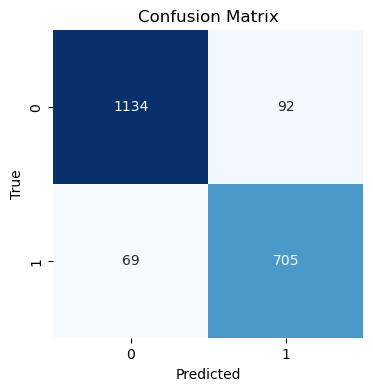

In [ ]:
# confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

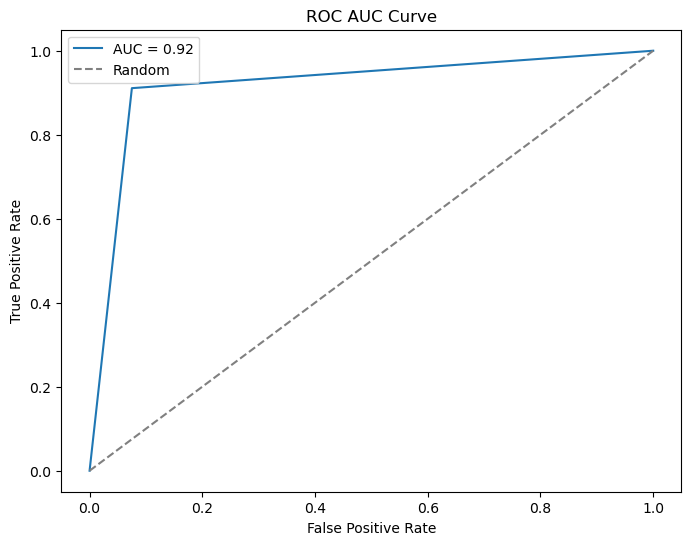

In [ ]:
# ROC & AUC Curve
y_prob = tree_classifier.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)
fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.title('ROC AUC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

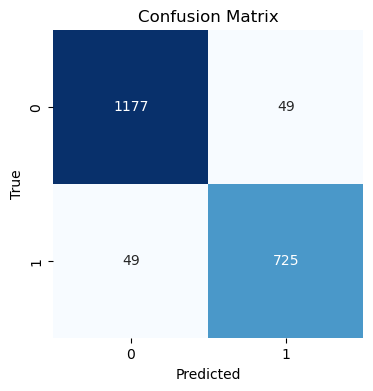

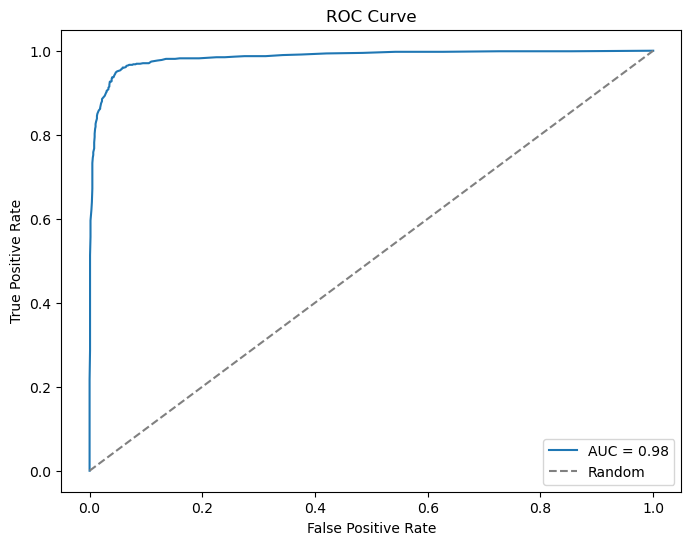

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# random forest model
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_classifier.fit(X_train, y_train)

# prediction
y_pred = random_forest_classifier.predict(X_test)

# model evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# confusion matrix
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# ROC & AUC curve
fpr, tpr, _ = roc_curve(y_test, random_forest_classifier.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()